<a href="https://colab.research.google.com/github/maulanawirawan/Object-Detection-Task/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection - YOLOv5

> Indented block


Dibuat dan dipaparkan oleh:

<img src="https://hmtt-telco.com/wp-content/uploads/2018/05/IMV.png" width="200px"/>

© 2022 Image Processing and Vision Laboratory

[Instagram](https://www.instagram.com/imv.laboratory) |  [LinkedIn](https://www.linkedin.com/company/imv-laboratory/)  |  [OA Line](http://line.me/ti/p/@uyy9001n)
<br/>
<br/>

# Hand Gesture menggunakan YOLOv5

<img src="https://github.com/kurnivan-ny/image/blob/main/dataset.png?raw=true" width="480px"/>

# Persipkan environment YOLOv5

Membuat direktori root

Membuat direktori dataset menggunakan perintah `mkdir` dan masuk direktori dataset meggunakan perintah `cd`

In [ ]:
!mkdir hand_gesture
%cd hand_gesture

Clone *source code* YOLOv5 dari Github.

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Install semua daftar dependency/package Python yang diperlukan

In [ ]:
%cd yolov5
!pip install -r requirements.txt # install dependencies

Install roboflow package menggunakan `pip`

In [ ]:
%pip install -q roboflow

# Persiapan Dataset

In [ ]:
import os

os.environ["DATASET_DIRECTORY"] = "/content/hand_gesture/datasets"

Download dataset menggunakan `API Roboflow`

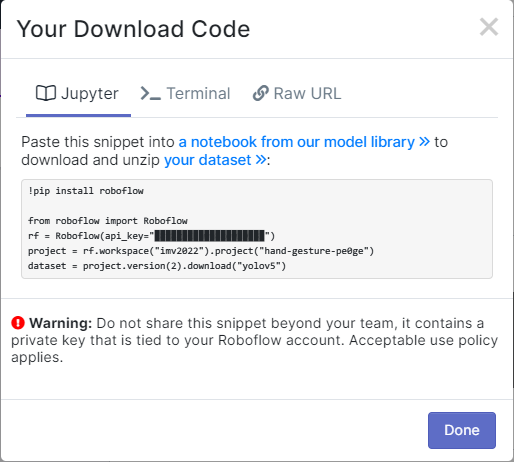

In [ ]:
from roboflow import Roboflow


rf = Roboflow(api_key="E8t8gJCFhwa8zow1D5B1")
project = rf.workspace("imv2022").project("hand-gesture-pe0ge")
dataset = project.version(2).download("yolov5")

Atau dapat menggunakan clone github

```
!git clone https://github.com/kurnivan-ny/hand_gesture.git
```

```
datasets
│    Hand-Gesture-2
└─── train
│   └─── images
│   └─── labels -> Anotasi YOLOv5 (DARKNET YOLO)
└─── valid
│   └─── images
│   └─── labels -> Anotasi YOLOv5 (DARKNET YOLO)
│
└─── README.dataset.txt -> informasi mengenai dataset
└─── README.roboflow.txt -> informasi mengenai roboflow (jumlah image, format anotasi, preprocessing, dll)
└─── data.yaml -> konfigurasi dataset yang akan di-training
```

Anotasi YOLOv5 (DARKNET YOLO):

- `class_code`: dimulai dari 0 sampai seterusnya, seperti contoh berikut.
```
{'ok': 0, 'stop': 1, 'thumb_down': 2, 'thumb_up': 3}
```
- `x_center = ((xmin + xmax) / 2) / img_width`
- `y_center = ((ymin + ymax) / 2) / img_height`
- `bbox_width = (xmax - xmin) / img_width`
- `bbox_height = (ymax - ymin) / img_height`

Sehingga, bentuk anotasi YOLOv5 (DARKNET YOLO) adalah sebagai berikut:
```
1 0.59375 0.4675480769230769 0.15384615384615385 0.24519230769230768
```

Periksa total gambar pada dataset

In [ ]:
IMAGE_DIR = '/content/hand_gesture/datasets/Hand-Gesture-2/*/images' # image directory
IMAGE_DIR_TRAIN = '/content/hand_gesture/datasets/Hand-Gesture-2/train/images' # image train directory
IMAGE_DIR_VALID = '/content/hand_gesture/datasets/Hand-Gesture-2/valid/images' # image valid directory

In [ ]:
from glob import glob

image_paths = glob(IMAGE_DIR + '/*.jpg')
print(f'Jumlah file gambar: {len(image_paths)}')

image_paths_train = glob(IMAGE_DIR_TRAIN + '/*.jpg')
print(f'Jumlah file gambar pada train: {len(image_paths_train)}')

image_paths_valid = glob(IMAGE_DIR_VALID + '/*.jpg')
print(f'Jumlah file gambar pada valid: {len(image_paths_valid)}')

Periksa total anotasi pada dataset

In [ ]:
ANNOTATION_DIR = '/content/hand_gesture/datasets/Hand-Gesture-2/*/labels'# anotasi directory
ANNOTATION_DIR_TRAIN = '/content/hand_gesture/datasets/Hand-Gesture-2/train/labels'# anotasi train directory
ANNOTATION_DIR_VALID = '/content/hand_gesture/datasets/Hand-Gesture-2/valid/labels'# anotasi valid directory

In [ ]:
annotation_paths = glob(ANNOTATION_DIR + '/*.txt')
print(f'Jumlah file anotasi txt: {len(annotation_paths)}')

annotation_paths_train = glob(ANNOTATION_DIR_TRAIN + '/*.txt')
print(f'Jumlah file anotasi txt pada train: {len(annotation_paths_train)}')

annotation_paths_valid = glob(ANNOTATION_DIR_VALID + '/*.txt')
print(f'Jumlah file anotasi txt pada valid: {len(annotation_paths_valid)}')

Periksa total kategori/class pada anotasi ground-truth dari dataset

In [ ]:
amount_per_class = {}

for i in range(len(annotation_paths)):
  f = open(annotation_paths[i], "r")
  for anotate in f:
      if anotate[0] not in amount_per_class.keys():
        amount_per_class[anotate[0]] = 1
      else:
        amount_per_class[anotate[0]] += 1

print(f"Jumlah total objek: {sum(amount_per_class.values())}")
print(f'Jumlah objek per class: {amount_per_class}')

In [ ]:
amount_per_class = {}

for i in range(len(annotation_paths_train)):
  f = open(annotation_paths_train[i], "r")
  for anotate in f:
      if anotate[0] not in amount_per_class.keys():
        amount_per_class[anotate[0]] = 1
      else:
        amount_per_class[anotate[0]] += 1

print(f"Jumlah total objek pada train: {sum(amount_per_class.values())}")
print(f'Jumlah objek per class pada train: {amount_per_class}')

In [ ]:
amount_per_class = {}

for i in range(len(annotation_paths_valid)):
  f = open(annotation_paths_valid[i], "r")
  for anotate in f:
      if anotate[0] not in amount_per_class.keys():
        amount_per_class[anotate[0]] = 1
      else:
        amount_per_class[anotate[0]] += 1

print(f"Jumlah total objek pada valid: {sum(amount_per_class.values())}")
print(f'Jumlah objek per class pada valid: {amount_per_class}')

```
datasets
|
└─── Hand-Gesture-2
      │    
      └─── train
      │   └─── images
      │   └─── labels -> Anotasi YOLOv5 (DARKNET YOLO)
      └─── valid
      │   └─── images
      │   └─── labels -> Anotasi YOLOv5 (DARKNET YOLO)
      │
      └─── README.dataset.txt -> informasi mengenai dataset
      └─── README.roboflow.txt -> informasi mengenai roboflow (jumlah image, format anotasi, preprocessing, dll)
      └─── data.yaml -> konfigurasi dataset yang akan di-training
```

# Training Custom Data menggunakan YOLOv5

Gunakan *source code* YOLOv5 yang ada pada Github *repository* berikut [ultralytics/yolov5](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data)

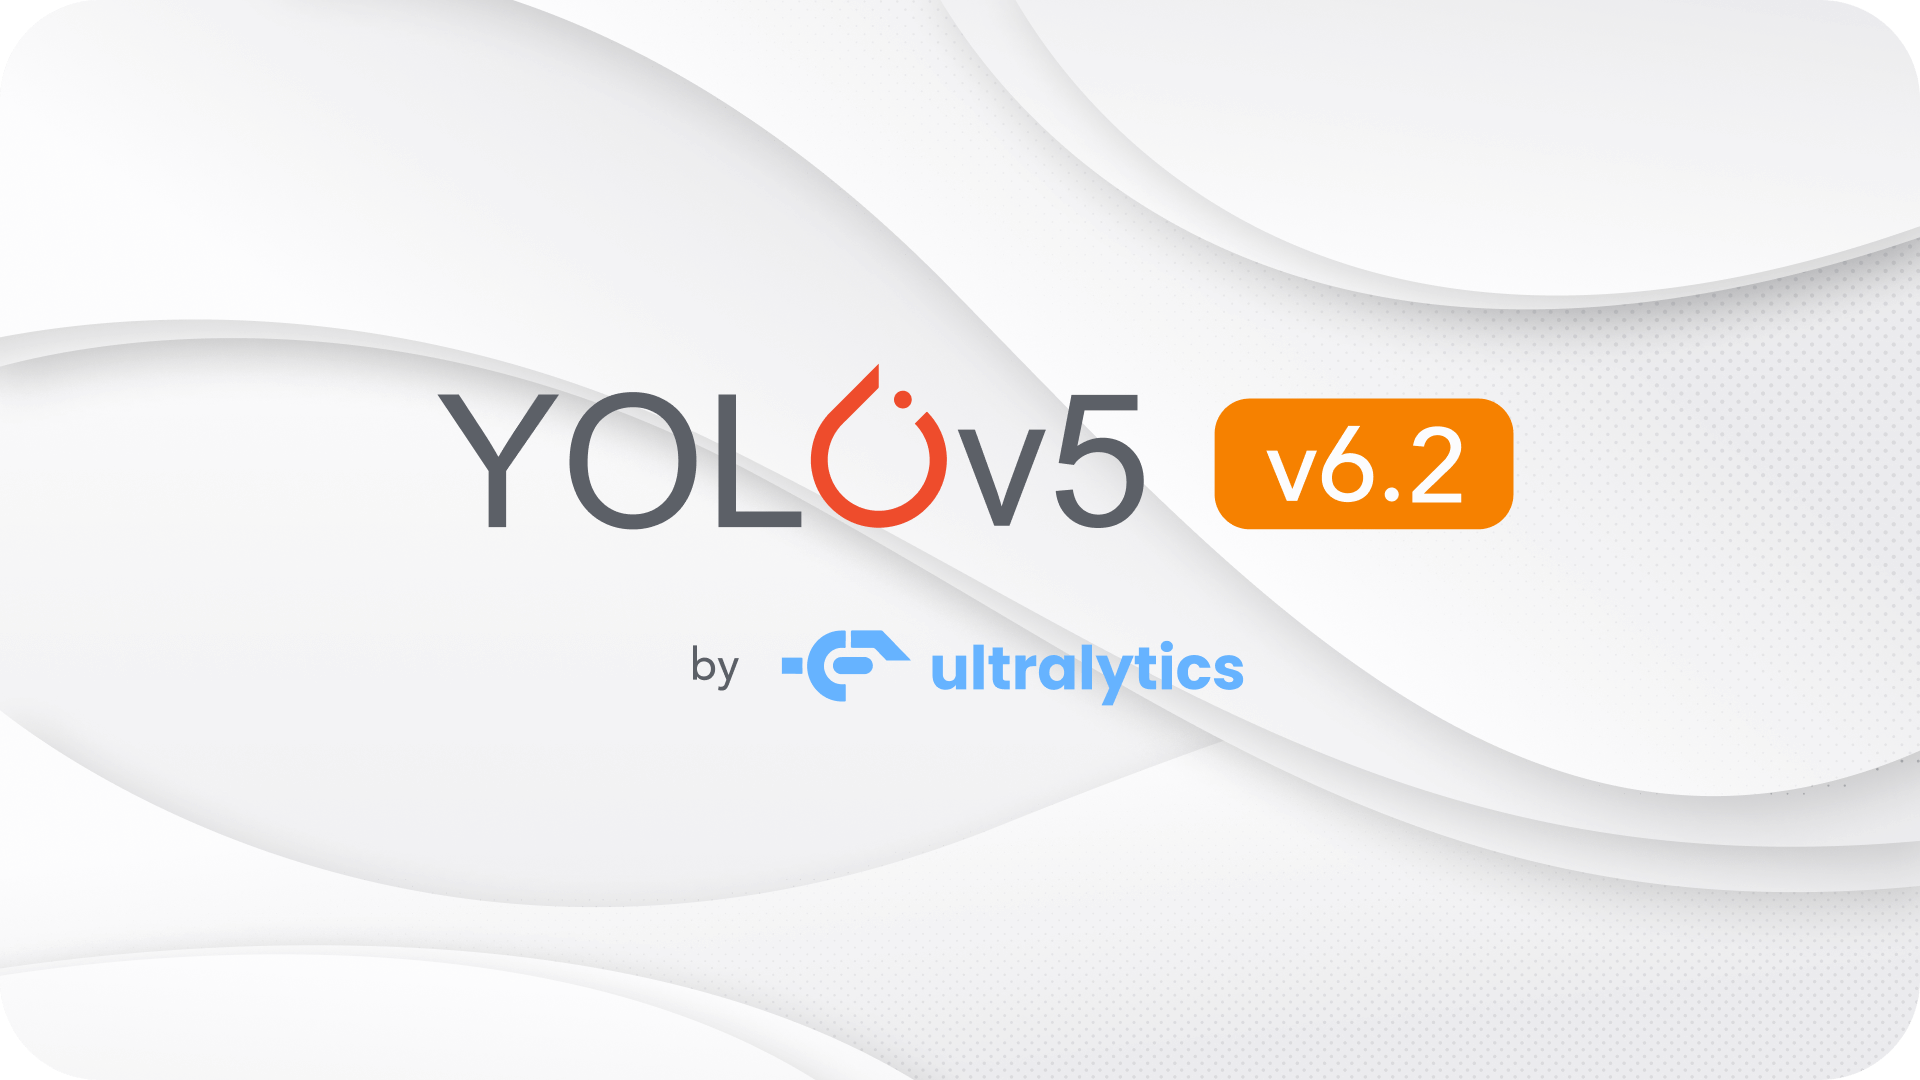

Pada folder `hand_gesture` akan terlihat seperti ini:

```
hand_gesture
  > dataset
  > yolov5
```

## Persiapan *working directory* dan *training resources*

## Memulai training dengan YOLOv5

Jenis arsitektur yang akan digunakan adalah YOLOv5s atau YOLOv5 Small karena ukurannya kecil dan memiliki *latency* yang kecil, cocok digunakan secara realtime.

<img src="https://github.com/ultralytics/yolov5/releases/download/v1.0/model_comparison.png" width="500" />

In [ ]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

In [ ]:
%pwd

In [ ]:
!python train.py --img 416 --batch 16 --epochs 20 --data /content/hand_gesture/datasets/Hand-Gesture-2/data.yaml --weights '' --cfg /content/hand_gesture/yolov5/models/hub/yolov5n6.yaml --cache

Jika ingin melanjutkan training, maka jalankan train.py dengan nilai flag --weights yaitu path dari checkpoint terakhir last.pt dan tambahkan --resume

In [ ]:
!python train.py \
  --resume \
  --img <image-size> \
  --batch <batch-size> \
  --data <data-directory> \
  --cache

Setelah proses training selesai, kita juga akan mendapatkan beberapa gambar yang secara otomatis disimpan oleh script dari YOLOv5 untuk mengevaluasi hasil training. Salah satu yang paling penting adalah file `results.png`

In [ ]:
from IPython.display import Image
Image('/content/hand_gesture/yolov5/runs/train/exp/results.png') #filename results.png

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

Melakukan validasi menggunakan data pada validasi. Untuk proses validasi sebenarnya sudah dilakukan ketika training diakhir, tetapi apabila ingin memvalidasi dengan data validasi baru dapat menggunakan perintah `val.py`

In [ ]:
!python val.py \
  --weights '/content/hand_gesture/yolov5/runs/train/exp/weights/best.pt' \
  --data /content/hand_gesture/datasets/Hand-Gesture-2/data.yaml \
  --img 416

Download model YOLOv5

In [ ]:
from google.colab import files
files.download('/content/hand_gesture/yolov5/runs/train/exp/weights/best.pt') # file best.pt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Mencoba hasil training

Melakukan deteksi pada beberapa gambar pada dataset validation

In [ ]:
!python detect.py \
  --source /content/hand_gesture/datasets/Hand-Gesture-2/valid/images/ \
  --weights /content/hand_gesture/yolov5/runs/train/exp/weights/best.pt \
  --img 416 \
  --conf 0.5 \
  --exist-ok

Menampilkan semua gambar hasil deteksi

In [ ]:
from IPython.display import Image, display
import glob

for imageName in glob.glob('/content/hand_gesture/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

Mencoba deteksi gestur tangan langsung dengan webcam di google colabs

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  !python detect.py \
    --source {filename} \
    --weights /content/hand_gesture/yolov5/runs/train/exp/weights/best.pt \
    --img 416 \
    --line-thickness 1 \
    --conf-thres 0.5 \
    --iou-thres 0.5 \
    --exist-ok

  # Show the image which was just taken.
  display(Image(f'runs/detect/exp/{filename}'))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))